In [82]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import numpy as np

TF Image Practice with MNIST


Fairly simple dataset, just practicing image manipulation techniques

Image Techniques first with Numpy and Pillow 

Then move on to Tensorflow to apply to entire Dataset

In [32]:
dataset, info = tfds.load('mnist', split=['train', 'test'], with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset

Simple Grid Plotting

2025-01-31 11:39:37.146246: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


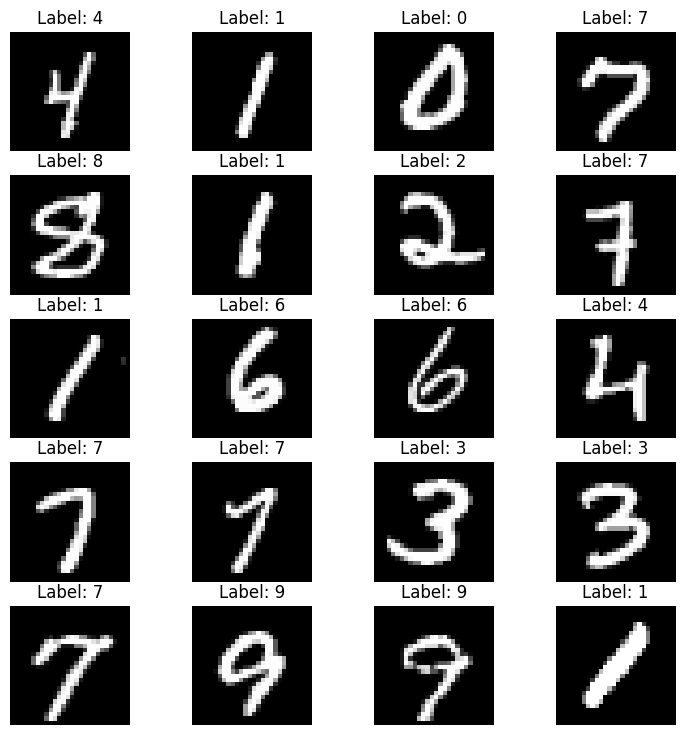

In [133]:
def plot_images(dt, num_images=16):
    fig, axes = plt.subplots(5,4, figsize=(9, 9))
    for i, (image, label) in enumerate(dt.take(num_images)):
        ax = axes[i // 4, i % 4]
        ax.imshow(image.numpy().squeeze(), cmap='grey')
        ax.set_title(f"Label: {label.numpy()}")
        ax.axis('off')
    plt.show()

plot_images(train_dataset, 20)

Practice Saving Images from TF Dataset

In [74]:
#Saving Practice
def save_images(dt, num_to_save): 
    for image, label in dt.take(num_to_save):
        numpy = image.numpy().squeeze()
        file = Image.fromarray(numpy)
        file = file.resize((400,400))
        file.save(f"{label.numpy()}.png", format='PNG')

save_images(train_dataset, 10)

2025-01-31 10:56:21.313727: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Gaussian Blur Pratice

2025-01-31 11:08:17.917753: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


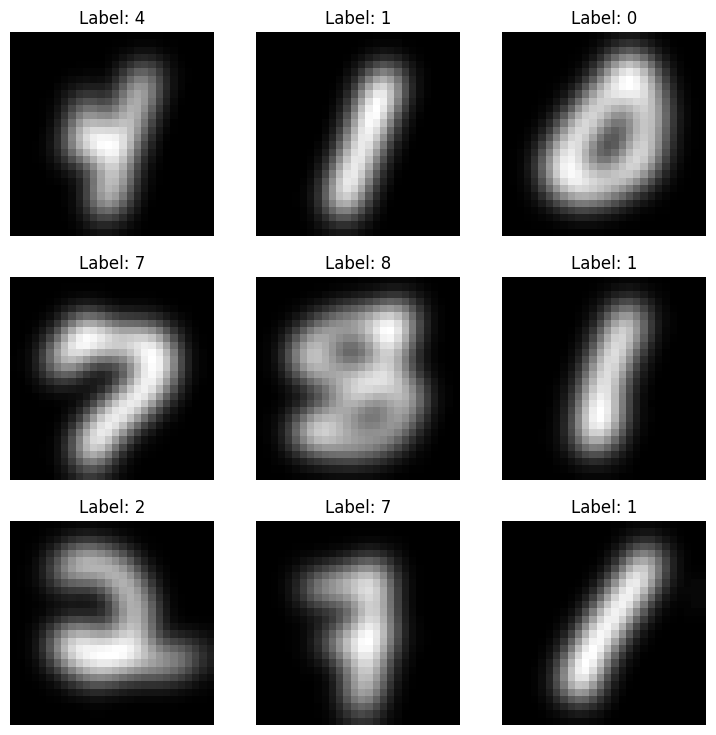

In [90]:
def gaussian_blur(df, num_images, blur_radius):
    fig, axes = plt.subplots(3,3, figsize = (9,9))
    for i, (image, label) in enumerate(df.take(num_images)): 
        image_array  = image.numpy().squeeze()
        image_pil = Image.fromarray(image_array)
        blurred = image_pil.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        ax = axes[i // 3, i % 3]
        ax.imshow(np.array(blurred), cmap='grey')
        ax.set_title(f"Label: {label.numpy()}")
        ax.axis('off')
    plt.show()

gaussian_blur(train_dataset, 9, 2)

    

Rotations Practice

2025-01-31 11:10:12.701330: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


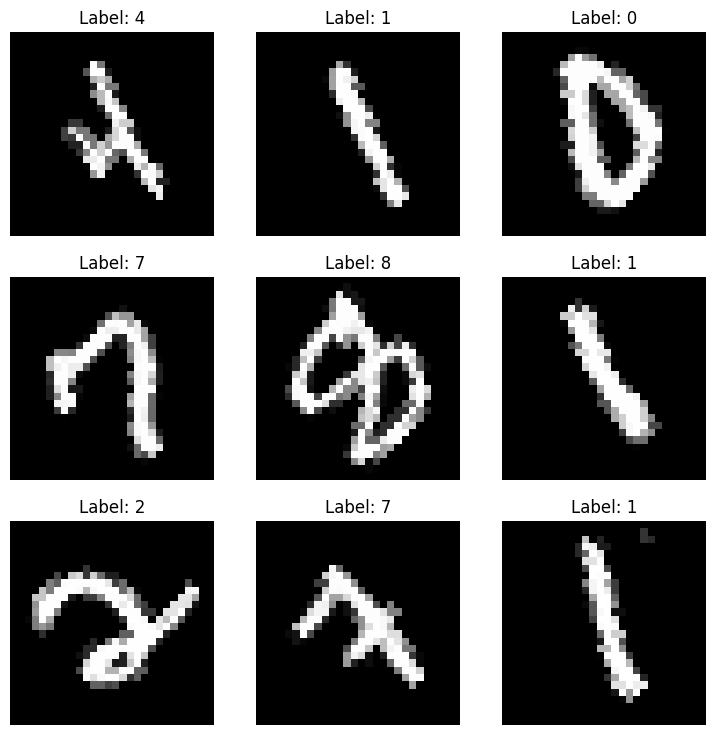

In [92]:
def rotations(df, num_images, degrees):
    fig, axes = plt.subplots(3,3, figsize = (9,9))
    for i, (image, label) in enumerate(df.take(num_images)): 
        image_array  = image.numpy().squeeze()
        image_pil = Image.fromarray(image_array)
        rotated = image_pil.rotate(degrees)
        ax = axes[i // 3, i % 3]
        ax.imshow(np.array(rotated), cmap='grey')
        ax.set_title(f"Label: {label.numpy()}")
        ax.axis('off')
    plt.show()

rotations(train_dataset, 9, 45)

    

Finally, Random Noise
Very Helpful for Helping the Model to Generalize

2025-01-31 11:40:21.898057: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


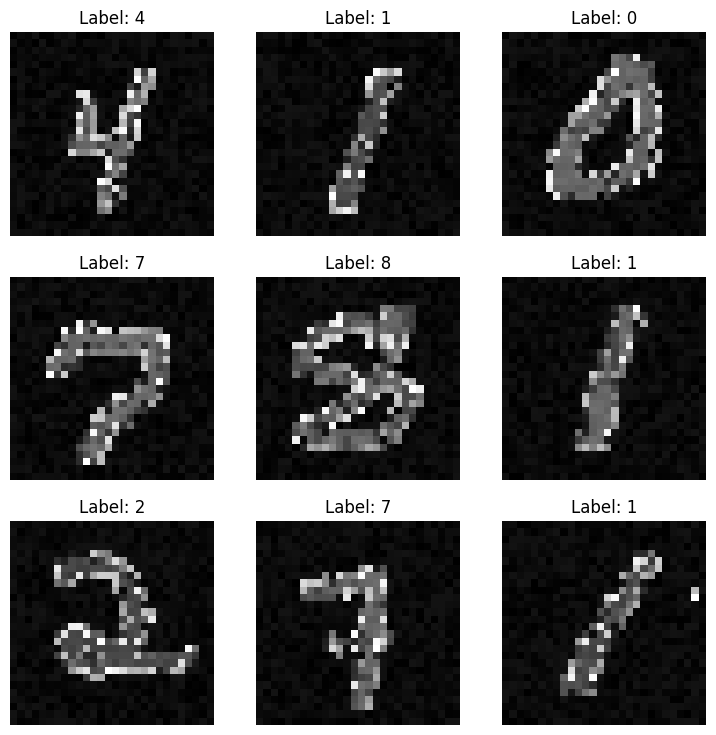

In [135]:
def random_noise(df, num_images, noise):
    fig, axes = plt.subplots(3,3, figsize = (9,9))
    for i, (image, label) in enumerate(df.take(num_images)): 
        image_array  = image.numpy().squeeze() * 225
        noise_filter = np.random.randint(0, noise, image_array.shape, dtype='uint8')
        noisy_image = np.clip(image_array + noise_filter, 0, 255).astype('uint8')
        ax = axes[i // 3, i % 3]
        ax.imshow(np.array(noisy_image), cmap='gray')
        ax.set_title(f"Label: {label.numpy()}")
        ax.axis('off')
    plt.show()

random_noise(train_dataset, 9, 20)

These Functions could all be useful but how to apply to TF Dataset?
Can use TF ops, and map function

First up Normalization + Random Noise

In [130]:
def normalize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # Normalize to [0,1]
    return image, label

def add_random_noise_tf(image, label, noise_level=0.2):
    # Generate random noise from a uniform distribution
    noise = tf.random.uniform(shape=tf.shape(image), minval=-noise_level, maxval=noise_level)
    # Add noise and clip to [0,1] range
    noisy_image = tf.clip_by_value(image + noise  , 0.0, 1.0)


    return noisy_image, label

normalized_train_dataset = train_dataset.map(lambda img, label: normalize_image(img, label))
normalized_test_dataset = test_dataset.map(lambda img, label: normalize_image(img, label))
noisy_train_dataset = normalized_train_dataset.map(lambda img, label: add_random_noise_tf(img, label, noise_level=0.5))


Dont Want to Fully Add Random Noise to every image

Can combine together, with this function, so 80% will be normal and 20% will be noisy

In [131]:

noisy_train_dataset = tf.data.experimental.sample_from_datasets(
    [normalized_train_dataset, noisy_train_dataset], weights=[0.8, 0.2]
)


2025-01-31 11:40:31.178538: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-31 11:40:31.178705: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


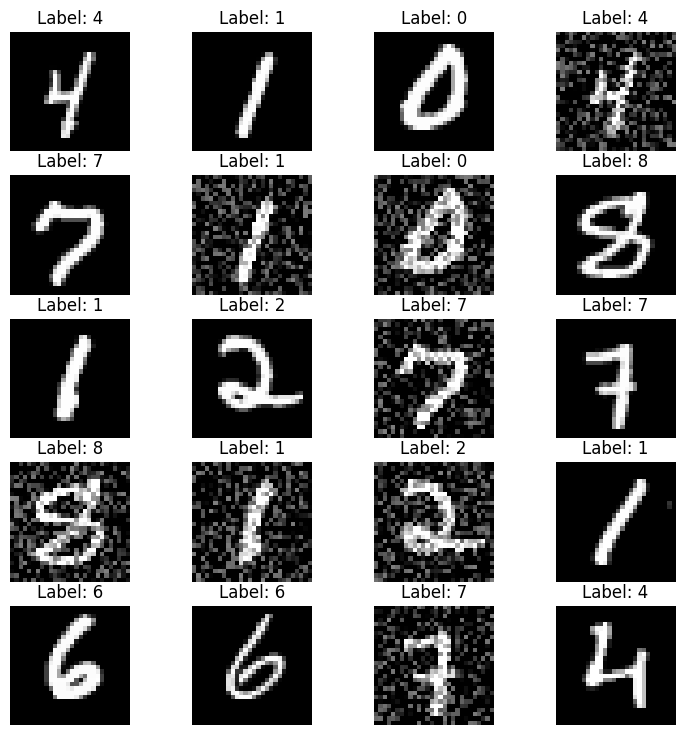

In [136]:
plot_images(noisy_train_dataset, 20)